In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [2]:
data = pd.read_csv('data\ex1data1.txt',header = None, names = ['Population', 'Profit'] )

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


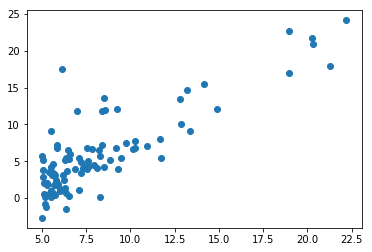

In [5]:
plt.scatter(data['Population'], data['Profit'])

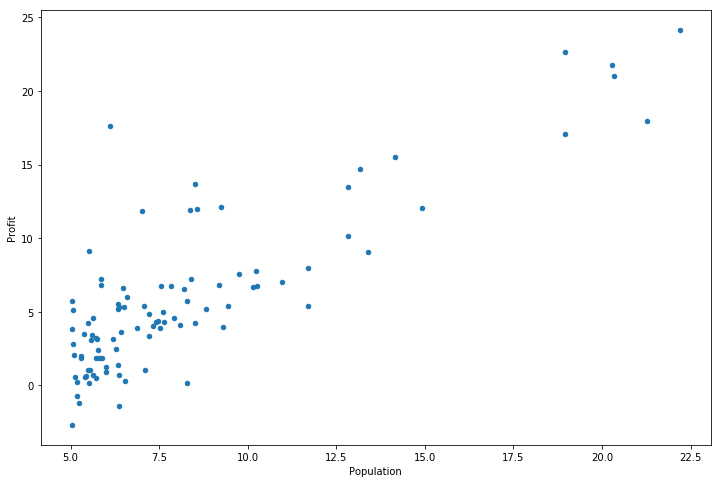

In [6]:
#Another way of ploting 
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [7]:
def computeCost(x,y,theta):
    inner = np.power(((x*theta.T) - y),2)
    return np.sum(inner)/(2*len(x))

In [8]:
data.insert(0, 'Ones', 1)

In [9]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [10]:
# set X (training data) and y (target variable)
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [11]:
x.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [12]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [13]:
# The cost function is expecting numpy matrices so we need to convert X and y before we can use them. We also need to initialize theta.
x=np.matrix(x.values)
y=np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [14]:
computeCost(x,y,theta)

32.072733877455676

In [15]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [16]:
alpha = 0.01
iters = 1000

In [17]:
g, cost = gradientDescent(x, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [18]:
computeCost(x, y, g)

4.515955503078912

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

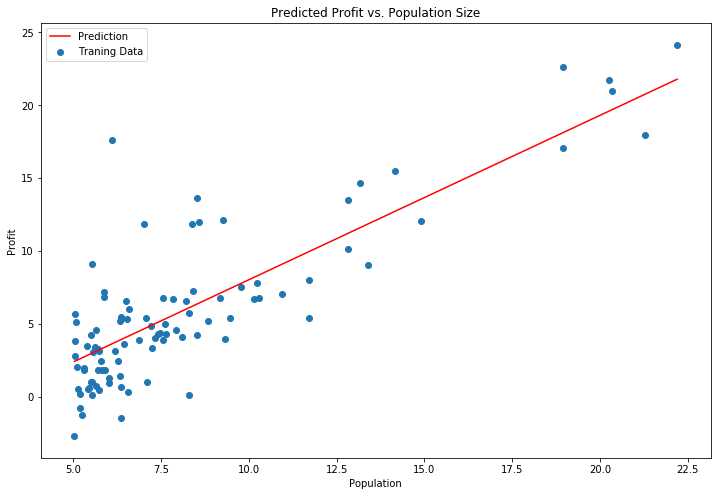

In [19]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')


Text(0.5, 1.0, 'Error vs. Training Epoch')

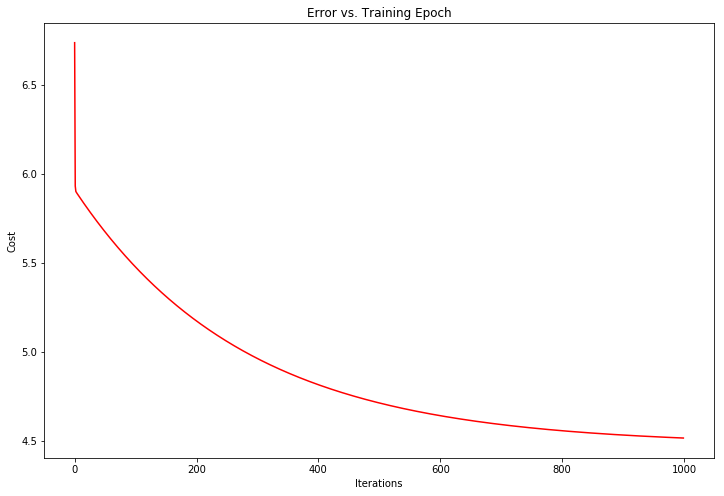

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [21]:
data2 = pd.read_csv('data\ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])

In [22]:
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [23]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [24]:
data2.insert(0,'Ones',1)

In [25]:
data2.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [26]:
cols = data2.shape[1]
#training data: x
x2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

#converting to numpy matrices
x2 = np.matrix(x2.values)
y2 = np.matrix(y2.values)

theta2 = np.matrix(np.array([0,0,0]))
g2, cost2 = gradientDescent(x2, y2, theta2, alpha, iters)
computeCost(x2, y2, g2)

0.13070336960771892

Text(0.5, 1.0, 'Error vs. Training Epoch')

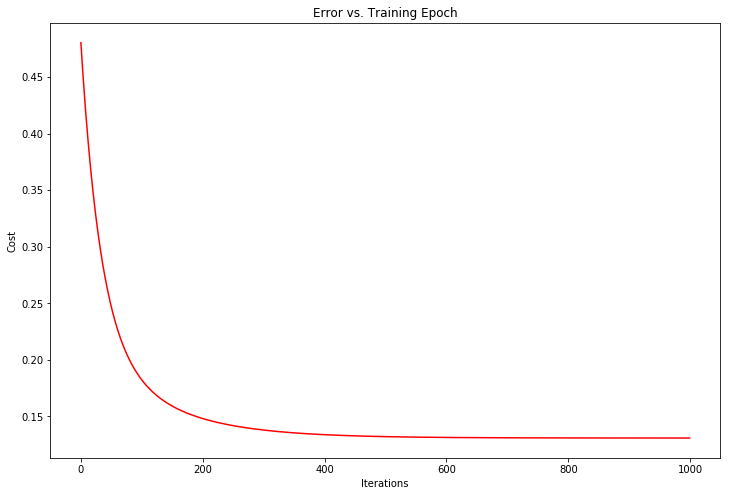

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# Linear Regression using sklearn

In [30]:
from sklearn import linear_model
model = linear_model.LinearRegression()
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
x=np.matrix(x.values)
y=np.matrix(y.values)
theta = np.matrix(np.array([0,0]))
reg = model.fit(x, y)

## Scikit learn's prediction

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

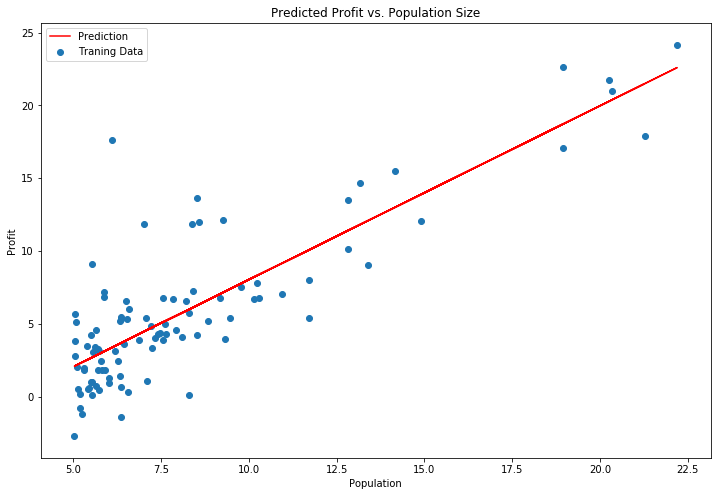

In [29]:
X = np.array(x[:, 1].A1)
f = model.predict(x).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')